In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


In [ ]:
image = np.load('../finalproject/carseg_data/clean_data/0_a.npy')

In [2]:
main_image = cv2.rotate(np.load(r"C:\Users\tala1\Downloads\carseg_data\carseg_data\clean_data\0_a.npy")[:3].T, cv2.ROTATE_90_CLOCKWISE)
rotated_image = cv2.rotate(main_image, cv2.ROTATE_90_CLOCKWISE)
feature_extraction = cv2.rotate(np.load(r"C:\Users\tala1\Downloads\carseg_data\carseg_data\clean_data\0_a.npy")[3:4].T, cv2.ROTATE_90_CLOCKWISE)

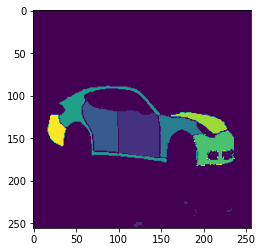

In [3]:
plt.imshow(feature_extraction)
plt.show()

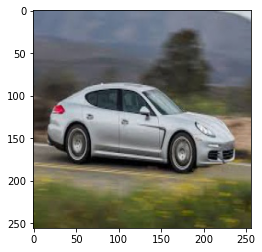

In [4]:
plt.imshow(main_image)
plt.show()

In [5]:
cv2.imshow('dagar', test_image[:3].T)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'test_image' is not defined

In [ ]:
'''
TODO:
1. Take one image and append it to a dataset(data matrix X and response Y) to be passed on to the actual Deep learning model
2. Create a loop to take iamges from a directory and create a matrix of n dimensions of images 
3. Make the code dynamic to take images from multiple directories to create the data matrix
4. Make the code take a number of arguments to specify sizes of the different sets and create train, test, val set of specified values
'''

In [6]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import datasets
from torchvision.transforms import ToTensor

In [7]:
split_image = cv2.imread("C:/Users/tala1/Downloads/carseg_data/carseg_data/carseg_raw_data/train/photo/0_a.jpg")


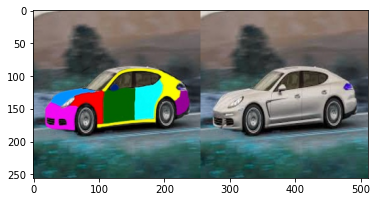

In [8]:
plt.imshow(split_image)

In [9]:
split_image.shape[1]

512

In [10]:
x = split_image[:,int(512/2):512, :3]
y = split_image[:,:int(512/2), :3] 

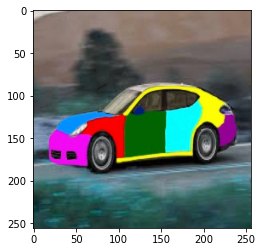

In [11]:
plt.imshow(split_image[:,:int(512/2), :3])

In [12]:
class CarSegmentationDataset(Dataset):
    def __init__(self, image_directory_one, transform=None):
        self.car_images_one = os.listdir(image_directory_one)
        self.directory_one = image_directory_one
        self.transform = transform

    def __len__(self):
        return len(self.car_images_one)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.directory_one, self.car_images_one[index])
        X_train =  cv2.rotate(np.load(img_path)[:3].T, cv2.ROTATE_90_CLOCKWISE)
        y_train = cv2.rotate(np.load(img_path)[3:4].T, cv2.ROTATE_90_CLOCKWISE)
        
        return X_train, y_train

In [13]:
new_class = CarSegmentationDataset('C:/Users/tala1/Downloads/carseg_data/carseg_data/clean_data/')

In [14]:
img1 = new_class[1][0]

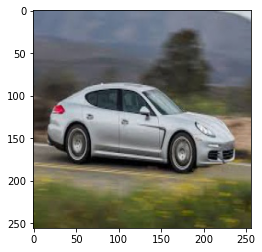

In [15]:
plt.imshow(img1)
plt.show()

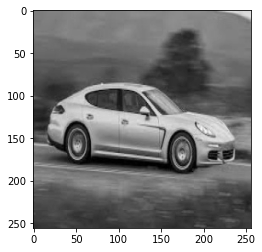

In [16]:
def grayscaling(img_path):
    img_float32 = np.float32(img_path)
    gray_image = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    plt.show()
grayscaling(img1)

In [17]:
data = CarSegmentationDataset(r"C:\Users\tala1\Downloads\carseg_data\carseg_data\clean_data")
train, test= train_test_split(data, test_size=0.2)

In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

In [24]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 256, 256, 3])
Labels batch shape: torch.Size([64, 256, 256])


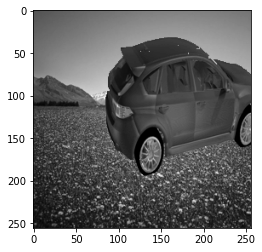

Label: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


In [27]:
img = train_features[0].squeeze()
label = train_labels[0]
grayscaling(img)
print(f"Label: {label}")